# Analyzing Car Prices

Dataset: https://www.kaggle.com/datasets/zahrayazdani81/carsdataset

## Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
cars = pd.read_csv("cardata.csv")
df = cars.copy()

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# There are no empty or missing values

In [7]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [8]:
df.shape

(301, 9)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [10]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

In [11]:
numeric_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


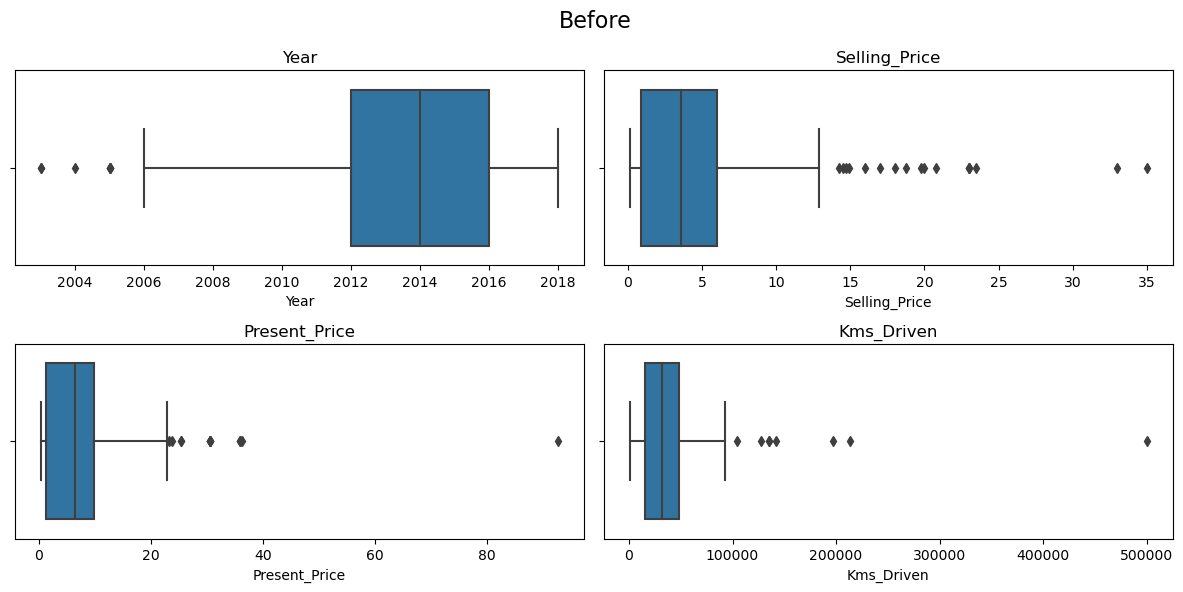

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

for i, column in enumerate(numeric_df.drop(columns=["Owner"]).columns):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
fig.suptitle("Before", fontsize=16)

plt.tight_layout()
plt.show()

In [13]:
# Let's handle outliers

In [14]:
for column in numeric_df.columns:
    Q1 = numeric_df[column].quantile(0.25)
    Q3 = numeric_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    numeric_df[column] = np.where(numeric_df[column] < lower_bound, lower_bound, numeric_df[column])
    numeric_df[column] = np.where(numeric_df[column] > upper_bound, upper_bound, numeric_df[column])

In [15]:
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.667774,2.768139,2006.00,2012.0,2014.0,2016.0,2018.00
Selling_Price,301.0,4.272359,3.749446,0.10,0.9,3.6,6.0,13.65
Present_Price,301.0,7.076578,6.162499,0.32,1.2,6.4,9.9,22.95
Kms_Driven,301.0,34426.617940,23726.441467,500.00,15000.0,32000.0,48767.0,99417.50
Owner,301.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.00


In [16]:
df[numeric_df.columns] = numeric_df

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.667774,2.768139,2006.00,2012.0,2014.0,2016.0,2018.00
Selling_Price,301.0,4.272359,3.749446,0.10,0.9,3.6,6.0,13.65
Present_Price,301.0,7.076578,6.162499,0.32,1.2,6.4,9.9,22.95
Kms_Driven,301.0,34426.617940,23726.441467,500.00,15000.0,32000.0,48767.0,99417.50
Owner,301.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.00


### Handling Car_Name Column

In [18]:
# We are going to use top 5 cars

In [19]:
top_car_names = df["Car_Name"].value_counts().index[:5] # Top 5 cars

df["Car_Name"] = df["Car_Name"].apply(lambda x: x if x in top_car_names else "Other") # "Other" cars

In [20]:
df["Car_Name"].value_counts()

Car_Name
Other            224
city              26
corolla altis     16
verna             14
fortuner          11
brio              10
Name: count, dtype: int64

In [21]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016.0,9.50,11.6,33988.0,Diesel,Dealer,Manual,0.0
297,brio,2015.0,4.00,5.9,60000.0,Petrol,Dealer,Manual,0.0
298,city,2009.0,3.35,11.0,87934.0,Petrol,Dealer,Manual,0.0
299,city,2017.0,11.50,12.5,9000.0,Diesel,Dealer,Manual,0.0
300,brio,2016.0,5.30,5.9,5464.0,Petrol,Dealer,Manual,0.0


## Analyzing Relationships

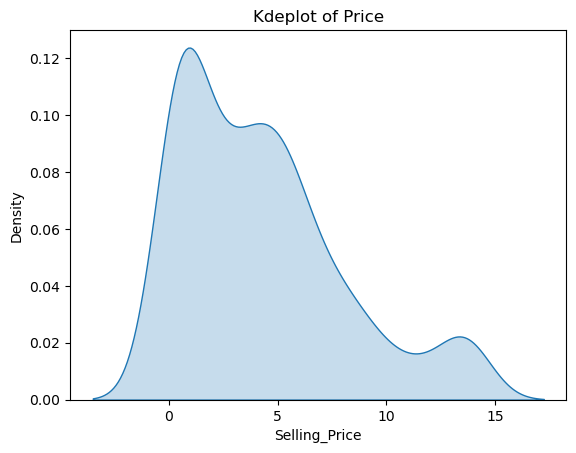

In [22]:
sns.kdeplot(df, x="Selling_Price", fill=True)
plt.title("Kdeplot of Price")
plt.show()

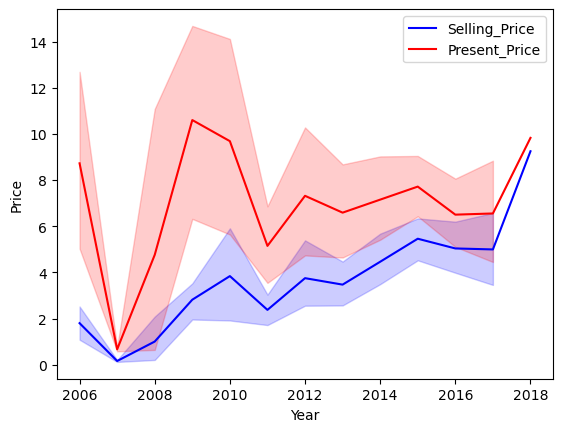

In [23]:
sns.lineplot(data=df, x="Year", y="Selling_Price", label="Selling_Price", color="blue")
sns.lineplot(data=df, x="Year", y="Present_Price", label="Present_Price", color="red")

plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

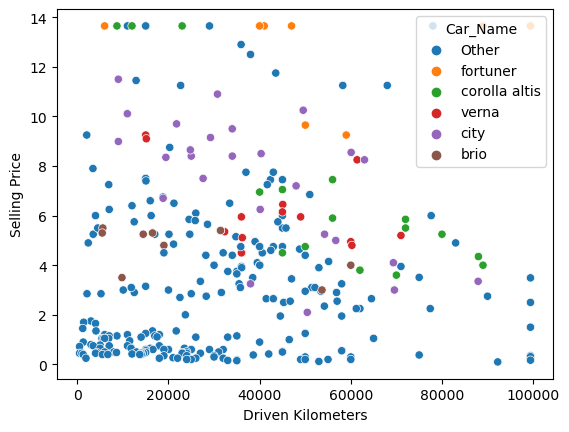

In [24]:
sns.scatterplot(data=df, x="Kms_Driven", y="Selling_Price", hue="Car_Name")

plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price")
plt.show()

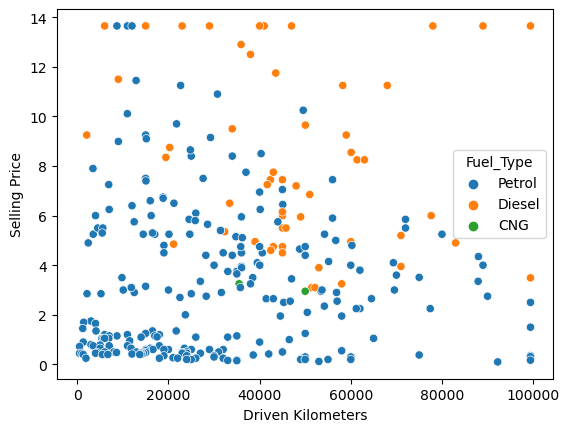

In [25]:
sns.scatterplot(data=df, x="Kms_Driven", y="Selling_Price", hue="Fuel_Type")

plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price")
plt.show()

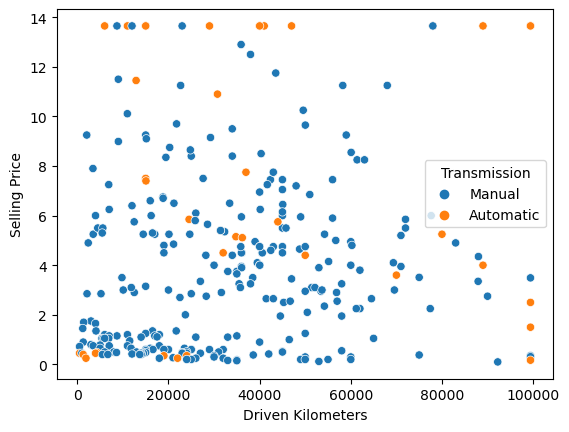

In [26]:
sns.scatterplot(data=df, x="Kms_Driven", y="Selling_Price", hue="Transmission")

plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price")
plt.show()

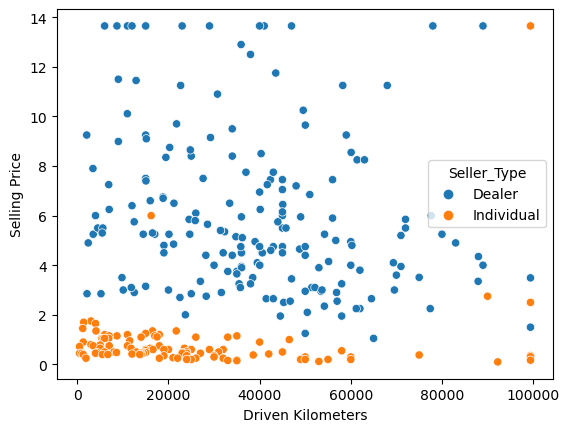

In [27]:
sns.scatterplot(data=df, x="Kms_Driven", y="Selling_Price", hue="Seller_Type")

plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price")
plt.show()

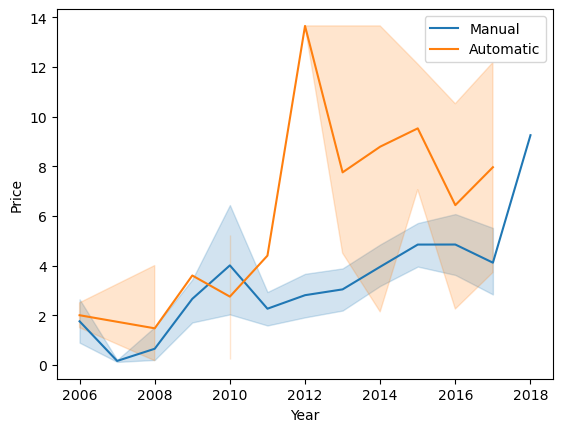

In [28]:
sns.lineplot(data=df, x="Year", y="Selling_Price", hue="Transmission")

plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

## Dummy

In [29]:
df = pd.get_dummies(df, columns=["Car_Name", "Fuel_Type", "Seller_Type", "Transmission"])

In [30]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Other,Car_Name_brio,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_verna,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014.0,3.35,5.59,27000.0,0.0,True,False,False,False,False,False,False,False,True,True,False,False,True
1,2013.0,4.75,9.54,43000.0,0.0,True,False,False,False,False,False,False,True,False,True,False,False,True
2,2017.0,7.25,9.85,6900.0,0.0,True,False,False,False,False,False,False,False,True,True,False,False,True
3,2011.0,2.85,4.15,5200.0,0.0,True,False,False,False,False,False,False,False,True,True,False,False,True
4,2014.0,4.60,6.87,42450.0,0.0,True,False,False,False,False,False,False,True,False,True,False,False,True


## Modeling

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
y = df["Selling_Price"]
X = df.drop(columns=["Selling_Price"]).astype({col: "int" for col in df.select_dtypes(include="bool").columns})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
# Correlation

corr_matrix = df.corr()
corr_with_price = corr_matrix["Selling_Price"].sort_values(ascending=False)
corr_with_price

Selling_Price             1.000000
Present_Price             0.871568
Seller_Type_Dealer        0.674330
Fuel_Type_Diesel          0.562846
Car_Name_fortuner         0.448186
Transmission_Automatic    0.301243
Year                      0.284371
Car_Name_city             0.258497
Car_Name_corolla altis    0.164348
Kms_Driven                0.127841
Car_Name_verna            0.108301
Car_Name_brio             0.023407
Fuel_Type_CNG            -0.025615
Transmission_Manual      -0.301243
Car_Name_Other           -0.505568
Fuel_Type_Petrol         -0.550860
Seller_Type_Individual   -0.674330
Owner                          NaN
Name: Selling_Price, dtype: float64

### Linear Regression

In [34]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

In [35]:
# PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [36]:
# SelectKBest

selector = SelectKBest(score_func=f_regression, k=10)
X_selected_train = selector.fit_transform(X_poly_train, y_train)
X_selected_test = selector.transform(X_poly_test)

In [37]:
linear_model = sm.OLS(y_train, X_selected_train).fit()

y_pred_linear = linear_model.predict(X_selected_test)
r2_score_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

In [38]:
r2_score_linear

0.9269616609868334

In [39]:
rmse_linear

1.0140532246655551

### PCR

In [40]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [41]:
pipeline_pcr = Pipeline([
    ("pca", PCA()),
    ("regression", LinearRegression())
])

In [42]:
param_grid = {
    "pca__n_components": [3, 5, 10, 15]
}

In [43]:
grid_search = GridSearchCV(pipeline_pcr, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('regression', LinearRegression())]),
             param_grid={'pca__n_components': [3, 5, 10, 15]}, scoring='r2')

In [44]:
best_model = grid_search.best_estimator_

In [45]:
y_pred_pcr = best_model.predict(X_test)
r2_score_pcr = r2_score(y_test, y_pred_pcr)
rmse_pcr = np.sqrt(mean_squared_error(y_test, y_pred_pcr))

In [46]:
r2_score_pcr

0.9068832294760388

In [47]:
rmse_pcr

1.1449835811181543

### PLS

In [48]:
from sklearn.cross_decomposition import PLSRegression

In [49]:
param_grid = {
    "n_components": [3, 5, 10, 15]
}

In [50]:
pls_model = PLSRegression()

In [51]:
grid_search = GridSearchCV(pls_model, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=PLSRegression(),
             param_grid={'n_components': [3, 5, 10, 15]}, scoring='r2')

In [52]:
best_model = grid_search.best_estimator_

In [53]:
y_pred_pls = best_model.predict(X_test)
r2_score_pls = r2_score(y_test, y_pred_pls)
rmse_pls = np.sqrt(mean_squared_error(y_test, y_pred_pls))

In [54]:
r2_score_pls

0.904447562419039

In [55]:
rmse_pls

1.1598616568658746

### Ridge

In [56]:
from sklearn.linear_model import Ridge

In [57]:
param_grid = {
    "alpha": [0.1, 1, 10, 100, 1000]
}

In [58]:
ridge_model = Ridge()

In [59]:
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]}, scoring='r2')

In [60]:
best_model = grid_search.best_estimator_

In [61]:
y_pred_ridge = best_model.predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

In [62]:
r2_score_ridge

0.9035875185985922

In [63]:
rmse_ridge

1.1650697775936947

### Lasso

In [64]:
from sklearn.linear_model import Lasso

In [65]:
param_grid = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [66]:
lasso_model = Lasso()

In [67]:
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2')

In [68]:
best_model = grid_search.best_estimator_

In [69]:
y_pred_lasso = best_model.predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

In [70]:
r2_score_lasso

0.903362232136362

In [71]:
rmse_lasso

1.1664301890928106

### ElasticNet

In [72]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

In [73]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("elasticnet", ElasticNet())
])

In [74]:
param_grid = {
    "elasticnet__alpha": [0.1, 1, 10, 100, 1000],
    "elasticnet__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1]
}

In [75]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [0.1, 1, 10, 100, 1000],
                         'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='r2')

In [76]:
best_model = grid_search.best_estimator_

In [77]:
y_pred_enet = best_model.predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
rmse_enet = np.sqrt(mean_squared_error(y_test, y_pred_enet))

In [78]:
r2_score_enet

0.8950441077618226

In [79]:
rmse_enet

1.2155944786439634

### Comparison

In [80]:
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "PCR", "PLS", "Ridge", "Lasso", "ElasticNet"],
    "RMSE": [rmse_linear, rmse_pcr, rmse_pls, rmse_ridge, rmse_lasso, rmse_enet],
    "R2 Score": [r2_score_linear, r2_score_pcr, r2_score_pls, r2_score_ridge, r2_score_lasso, r2_score_enet]
})

In [81]:
comparison_df

,Model,RMSE,R2 Score
0,Linear Regression,1.014053,0.926962
1,PCR,1.144984,0.906883
2,PLS,1.159862,0.904448
3,Ridge,1.165070,0.903588
4,Lasso,1.166430,0.903362
5,ElasticNet,1.215594,0.895044


### Overfitting check on ElasticNet

In [82]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain r2: {train_r2}")
print(f"Test r2: {test_r2}")
print(f"Train rmse: {train_rmse}")
print(f"Test rmse: {test_rmse}")


Train r2: 0.8974622729213229
Test r2: 0.8950441077618226
Train rmse: 1.1976265073513945
Test rmse: 1.2155944786439634


### Residual Analysis on ElasticNet

In [83]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

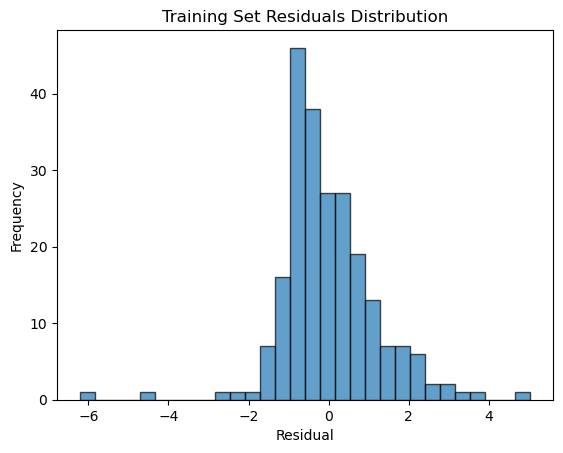

In [84]:
# Train set histogram
plt.hist(residuals_train, bins=30, edgecolor='k', alpha=0.7)
plt.title('Training Set Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

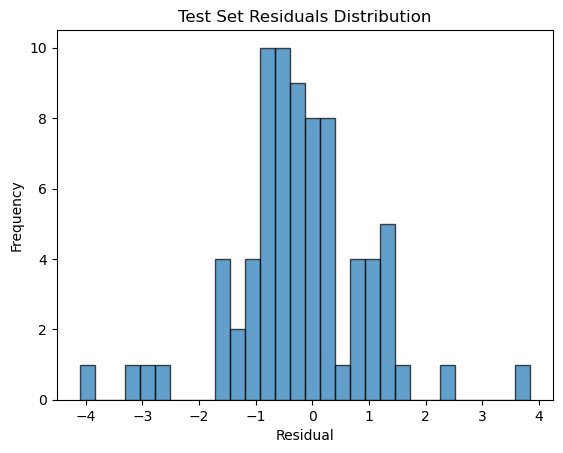

In [85]:
# Test set histogram
plt.hist(residuals_test, bins=30, edgecolor='k', alpha=0.7)
plt.title('Test Set Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

### Feature Importance Analysis on ElasticNet

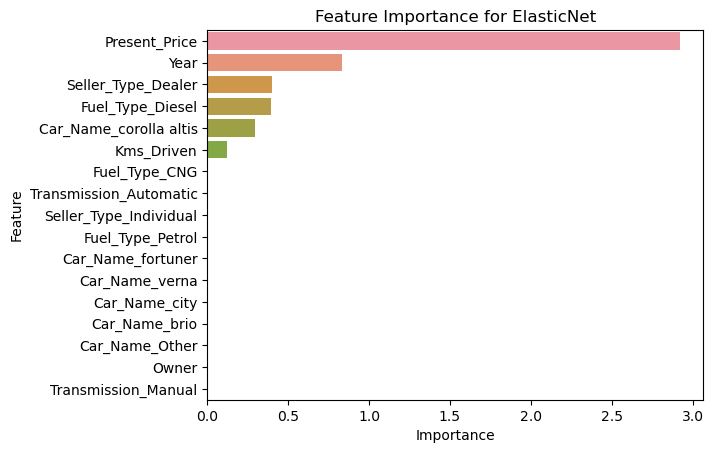

In [86]:
coefficients = best_model.named_steps["elasticnet"].coef_
importances = np.abs(coefficients)

features = X_train.columns
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

sns.barplot(data=feature_importance_df, x="Importance", y="Feature")
plt.title("Feature Importance for ElasticNet")
plt.show()

### Visualizing Actual vs. Predicted Values

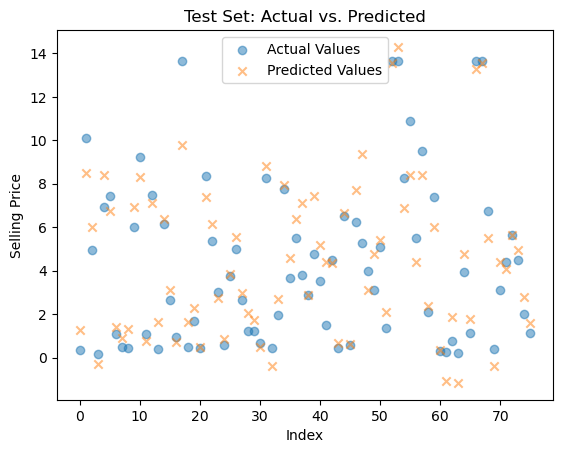

In [87]:
plt.scatter(range(len(y_test)), y_test, alpha=0.5, label='Actual Values')
plt.scatter(range(len(y_test)), y_test_pred, alpha=0.5, marker='x', label='Predicted Values')
plt.title('Test Set: Actual vs. Predicted')
plt.xlabel('Index')
plt.ylabel('Selling Price')
plt.legend()

plt.show()

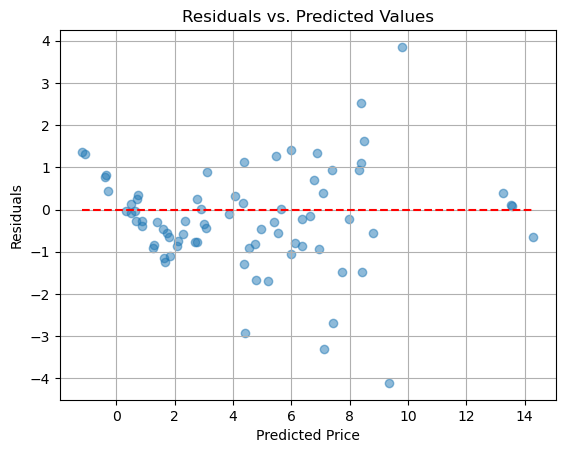

In [88]:
plt.scatter(y_test_pred, residuals_test, alpha=0.5)
plt.hlines(0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='red', linestyles='dashed')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### Prediction

In [89]:
df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Other,Car_Name_brio,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_verna,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014.0,3.35,5.59,27000.0,0.0,True,False,False,False,False,False,False,False,True,True,False,False,True
1,2013.0,4.75,9.54,43000.0,0.0,True,False,False,False,False,False,False,True,False,True,False,False,True


In [90]:
df = df.astype({col: "int" for col in df.select_dtypes(include="bool").columns}).head(2)

In [91]:
df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Other,Car_Name_brio,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_verna,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014.0,3.35,5.59,27000.0,0.0,1,0,0,0,0,0,0,0,1,1,0,0,1
1,2013.0,4.75,9.54,43000.0,0.0,1,0,0,0,0,0,0,1,0,1,0,0,1


In [92]:
data = {
    'Year': [2016],
    'Present_Price': [9.5],
    'Kms_Driven': [55000],
    'Owner': [1],
    'Car_Name_Other': [0],
    'Car_Name_brio': [0],
    'Car_Name_city': [0],
    'Car_Name_corolla altis': [0],
    'Car_Name_fortuner': [1],
    'Car_Name_verna': [0],
    'Fuel_Type_CNG': [0],
    'Fuel_Type_Diesel': [0],
    'Fuel_Type_Petrol': [1],
    'Seller_Type_Dealer': [0],
    'Seller_Type_Individual': [1],
    'Transmission_Automatic': [0],
    'Transmission_Manual': [1]
}

predict_df = pd.DataFrame(data)

In [93]:
predict_df.head()

,Year,Present_Price,Kms_Driven,Owner,Car_Name_Other,Car_Name_brio,Car_Name_city,Car_Name_corolla altis,Car_Name_fortuner,Car_Name_verna,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2016,9.5,55000,1,0,0,0,0,1,0,0,0,1,0,1,0,1


In [94]:
predicted_price = best_model.predict(predict_df)

In [95]:
predicted_price[0]

5.437112956025108